In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [4]:
zip_dir_base = os.path.dirname(zip_dir)
#!find $zip_dir_base -type d -print
#!find $zip_dir_base -type d -print

In [5]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
nums_cats_tr = len(os.listdir(train_cats_dir))
nums_dogs_tr = len(os.listdir(train_dogs_dir))

nums_cats_val = len(os.listdir(validation_cats_dir))
nums_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = nums_cats_tr+nums_dogs_tr
total_val = nums_cats_val+nums_dogs_val

In [7]:
print('Total training cat images: ',nums_cats_tr)
print('Total training dog images: ',nums_dogs_tr)

print('Total validation cat images: ',nums_cats_val)
print('Total validation dog images: ',nums_dogs_val)

print('Total training images: ',total_train)
print('Total validation images: ',total_val)

Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500
Total training images:  2000
Total validation images:  1000


In [8]:
# setting model parameters
# we'll set up variables which we will use later while pre-processing and training our netwrork

In [9]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [25]:
# data augmentation
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [27]:
# flip the images horizontally
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


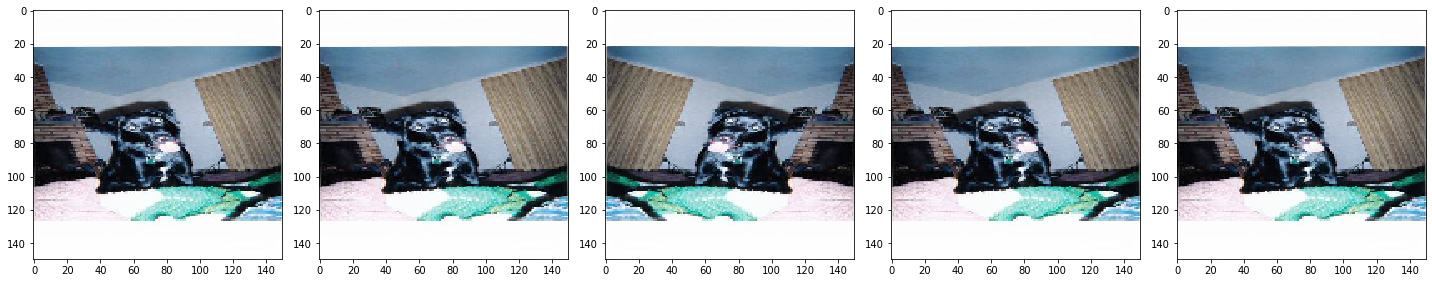

In [28]:
# To see the transformation in action, let's take one sample image from our training set and repeat it five times. 
#The augmentation will be randomly applied (or not) to each repetition.

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [29]:
# Rotating the images
image_gen = ImageDataGenerator(rescale = 1./255,rotation_range = 45)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


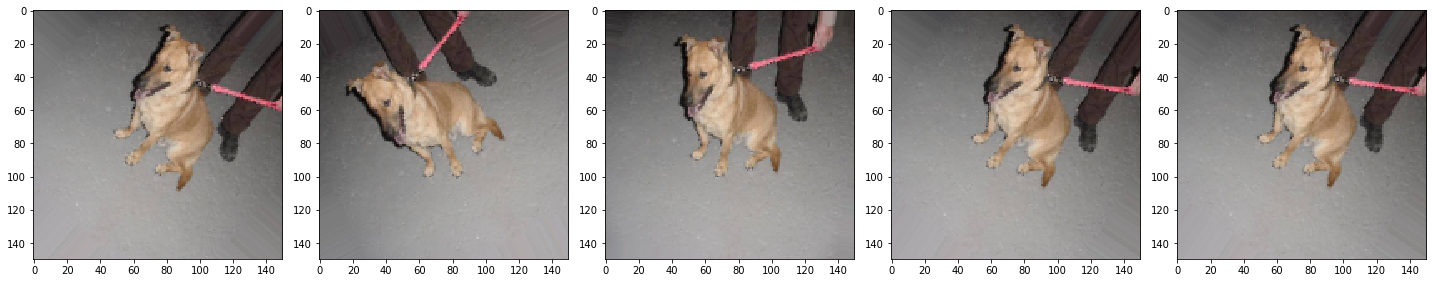

In [30]:
# see whether the images have been rotated or not
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [32]:
# zooming the images
image_gen = ImageDataGenerator(rescale=1./255,zoom_range = 0.5)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


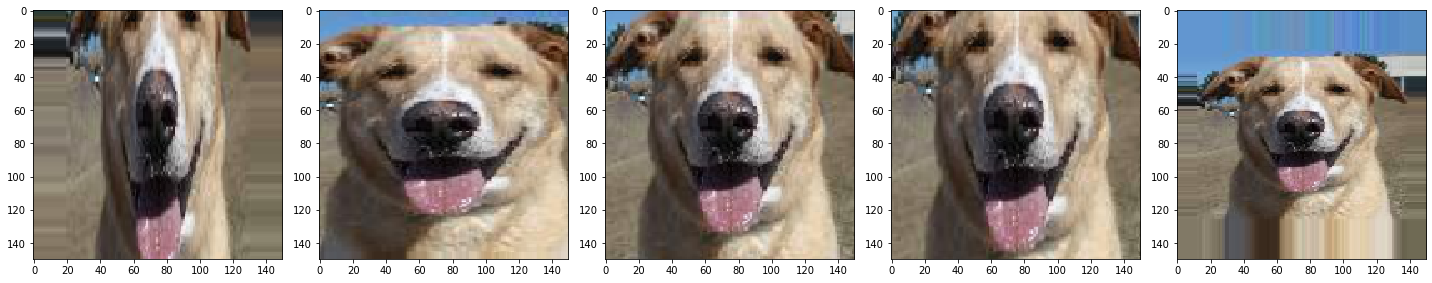

In [33]:
# see whether the images have been zoomed or not
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [34]:
# putting it all together

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


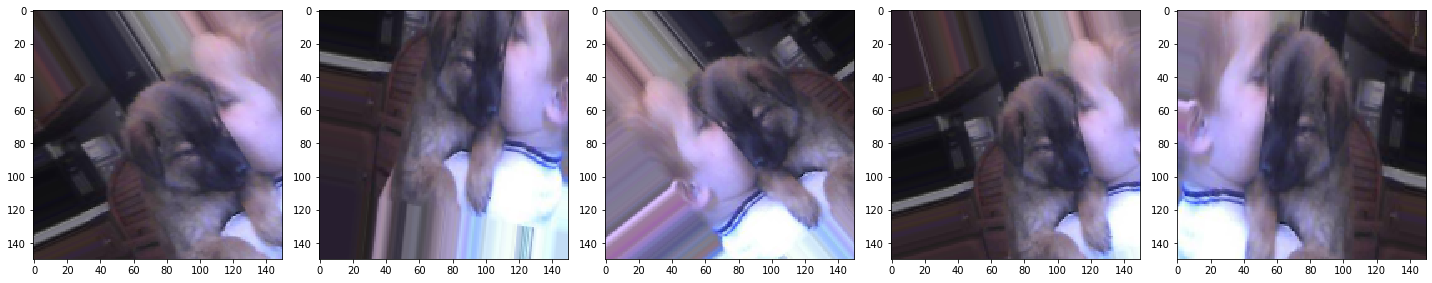

In [35]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [10]:
# data preparation
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                          directory = train_dir,
                                                          shuffle = True,
                                                          target_size = (IMG_SHAPE,IMG_SHAPE),
                                                          class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                             directory = validation_dir,
                                                             shuffle = True,
                                                             target_size=(150,150),
                                                             class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [13]:
# visualizing training images

In [14]:
sample_training_images,_ = next(train_data_gen) 

In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

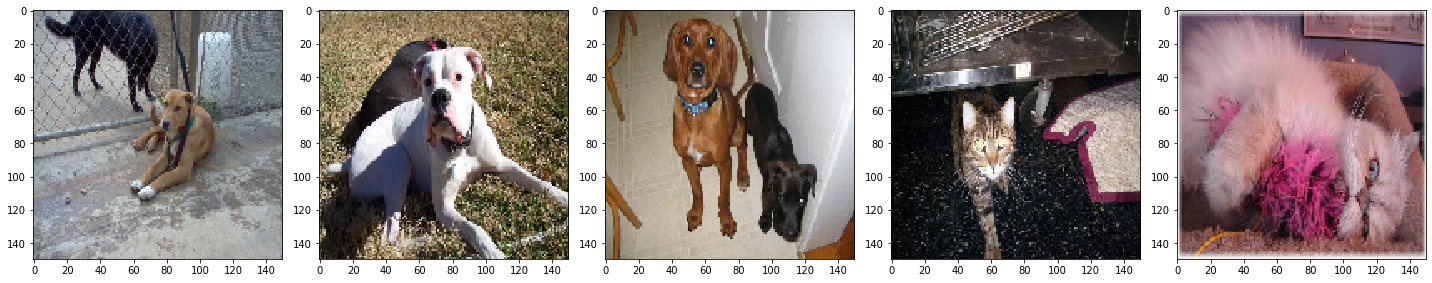

In [16]:
plotImages(sample_training_images[:5])

In [37]:
# Model creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [38]:
# compile the model

In [39]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [40]:
# model summary

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [42]:
# Train the model

In [43]:
EPOCHS = 40
history = model.fit_generator(
train_data_gen,
steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
epochs = EPOCHS,
validation_data = val_data_gen,
validation_steps = int(np.ceil(total_val/float(BATCH_SIZE)))
)

Epoch 1/40
20/20 [==============================] - 216s 11s/step - loss: 0.7001 - accuracy: 0.5095 - val_loss: 0.6889 - val_accuracy: 0.6450
Epoch 2/40
20/20 [==============================] - 210s 10s/step - loss: 0.6896 - accuracy: 0.5510 - val_loss: 0.6679 - val_accuracy: 0.6270
Epoch 3/40
20/20 [==============================] - 207s 10s/step - loss: 0.6697 - accuracy: 0.5850 - val_loss: 0.6450 - val_accuracy: 0.6110
Epoch 4/40
20/20 [==============================] - 205s 10s/step - loss: 0.6565 - accuracy: 0.5995 - val_loss: 0.6239 - val_accuracy: 0.6360
Epoch 5/40
20/20 [==============================] - 205s 10s/step - loss: 0.6275 - accuracy: 0.6340 - val_loss: 0.6020 - val_accuracy: 0.6680
Epoch 6/40
20/20 [==============================] - 205s 10s/step - loss: 0.6148 - accuracy: 0.6585 - val_loss: 0.5745 - val_accuracy: 0.6950
Epoch 7/40
20/20 [==============================] - 205s 10s/step - loss: 0.6088 - accuracy: 0.6630 - val_loss: 0.5932 - val_accuracy: 0.6770
Epoch 

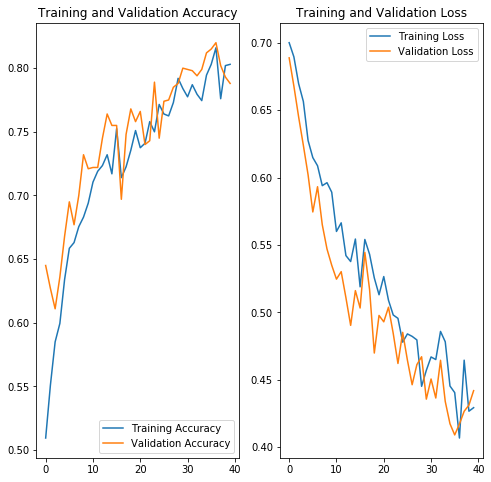

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()